# A/B-тест 1

**Цель проекта**:
При помощи А/B-теста проверить одну из приоритетных гипотез в маркетинговых целях.

**Задачи проекта**
1. применив фреймворки ICE и RICE выявить наиболее приоритетную гипотезу из подготовленной таблицы гипотез;
2. на основе проведенного А/В-теста:
- Построить график кумулятивной выручки по группам. Сделайте выводы и предположения.
- Построить график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
- Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
- Построить график кумулятивной конверсии по группам. Сделайте выводы и предположения.
- Построить график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.
- Построить точечный график количества заказов по пользователям. Сделайте выводы и предположения.
- Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
- Построить точечный график стоимостей заказов. Сделайте выводы и предположения.
- Посчитать 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
- Посчитать статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.
- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
- Посчитать статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.
- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
- Принять решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

## Приоритизация гипотез

### Импорт библиотек, параметры вывода и используемые функции 

In [1]:
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from scipy.stats import mannwhitneyu
import math
from pandas.plotting import register_matplotlib_converters
import warnings
register_matplotlib_converters()


In [2]:
#настраиваем формат вывода дробных чисел до двух знаков, а колонок датафреймов по максимуму, задаем размер будущих графиков
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_colwidth', None)
sns.set(rc={'figure.figsize':(10, 5)})

In [3]:
#задаем функцию для описания датафреймов
def info_data(data_frame):
    print('Информация о колонках\n')
    print( data_frame.info() )
    
    print('\nПервые 5 строк')
    display(data_frame.head())
    
    print('\nКоличество дубликатов в колонках')
    display(data_frame.duplicated().sum())
    
    return

### Предобработка данных

In [4]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

In [5]:
info_data(hypothesis)

Информация о колонках

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None

Первые 5 строк


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1



Количество дубликатов в колонках


0

In [6]:
#для удобства приведем все названия столбцов к нижнему регистру:
hypothesis.columns = [x.lower() for x in hypothesis.columns.values]

In [7]:
orders = pd.read_csv('/datasets/orders.csv')

In [8]:
info_data(orders)

Информация о колонках

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None

Первые 5 строк


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B



Количество дубликатов в колонках


0

In [9]:
#преобразуем столбец с датой в соответствующий тип:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [10]:
#для удобства изменим названия некоторых столбцов:
orders= orders.rename(columns={'transactionId':'transaction_id', 'visitorId':'visitor_id'})

In [11]:
visitors =pd.read_csv('/datasets/visitors.csv')

In [12]:
info_data(visitors)

Информация о колонках

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None

Первые 5 строк


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756



Количество дубликатов в колонках


0

In [13]:
#в этом датафрейме тоже преобразуем только столбец с датой:
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

### A/A тест

Прежде чем проводить А/B-тест, нужно убедиться, что:
- Количество пользователей в различных группах различается не более, чем на 1%;
- Для всех групп фиксируют и отправляют в системы аналитики данные об одном и том же;
- Различие ключевых метрик по группам не превышает 1% и не имеет статистической значимости;
- Попавший в одну из групп посетитель остаётся в этой группе до конца теста. Если пользователь видит разные версии исследуемой страницы в ходе одного исследования, неизвестно, какая именно повлияла на его решения. Значит, и результаты такого теста нельзя интерпретировать однозначно.

В нашем датасете результаты уже совершенного теста, но некоторые из пунктов можно проверить. Например, количество пользователей и их уникальность:

In [14]:
orders.groupby('group').agg({'visitor_id':('nunique','count')})

visitor_id      
         nunique count
group                 
A            503   557
B            586   640

Таблица говорит, что есть в датафрейме неуникальные пользователи, которые попадают и в ту, и другую группы. 

In [15]:
orders.groupby('visitor_id').agg({'group':'nunique'}).query('group>1').shape[0]

58

58 пользователей попадают в обе контрольные группы теста. если бы мы были на реальном А/А этапе, лучше было бы их разделить, но так как в результаты таблицы visitors они уже попали, и их нельзя вычислить, там не указан ID пользователя, их придется оставить.

Результаты будущего теста нельзя будет оценить однозначно из-за наличия пересечений в пользователях между двумя контрольными группами.

### Фреймворк ICE

In [16]:
hypothesis['ICE']= hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']
hypothesis.sort_values('ICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


**ICE выше всех у гипотезы о запуске акции, дающей скидку на товар в честь дня рождения. Такая акция способна увеличить лояльность пользователей и , теоретически, конверсию, если пропушить накануне уведомление.**

### Фреймворк RICE

In [17]:
hypothesis['RICE']= hypothesis['reach']*hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']
hypothesis.sort_values('RICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.00


In [18]:
#нашла интересный способ приоритизирования гипотез при помощи окрашивания градиентом:
hypothesis['RICE']=hypothesis['RICE'].astype(int)
hypothesis['ICE']=hypothesis['ICE'].astype(int)
cm=sns.light_palette("blue", as_cmap=True)
hypothesis[['hypothesis', 'RICE', 'ICE']].sort_values(by=['RICE', 'ICE'], ascending=False).style.background_gradient(cmap=cm)

,hypothesis,RICE,ICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112,11
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56,7
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40,13
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40,8
8,"Запустить акцию, дающую скидку на товар в день рождения",16,16
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9,1
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4,2
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4,1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1


**RICE выше всех у гипотезы о добавлении формы подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок. Без актуальной базы рассылок клиенты могут не узнать о всех акциях и персональных скидках.**

### Вывод

Разница в приоритетных гипотезах обусловлена применяемыми фреймворками: RICE учитывает дополнительный показатель 'Reach', который отвечает за охват пользователей. Считаю, что гипотеза по RICE наиболее приоритетна, так как чем полнее база данных, тем шире круг проинформированных о продукте пользователей, следовательно, будут лучше  пользовательские метрики в перспективе (удержание, конверсия, средний чек и LTV).

## Анализ A/B-теста

Сначала посмотрим на различия основных показателей двух групп, таких как количество посещений и количество заказов:

**Группа А**

In [19]:
print('Посещения-', visitors.query('group=="A"')['visitors'].sum())
print('Заказы-', orders.query('group=="A"')['transaction_id'].nunique())

Посещения- 18736
Заказы- 557


**Группа B**

In [20]:
print('Посещения-', visitors.query('group=="B"')['visitors'].sum())
print('Заказы-', orders.query('group=="B"')['transaction_id'].nunique())

Посещения- 18916
Заказы- 640


### График кумулятивной выручки по группам:

In [21]:
#создаем таблицу суммарной выручки заказов  в группе теста по указанную дату включительно.
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

In [22]:
ordersAggregated

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874
...,...,...,...,...,...
496,2019-08-29,B,596,544,5559398
730,2019-08-30,A,545,493,4022970
690,2019-08-30,B,620,567,5774631
958,2019-08-31,A,557,503,4084803


In [23]:
#подготовим таблицу, содержащую количество уникальных посетителей в группе теста по указанную дату включительно:
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])


In [24]:
visitorsAggregated

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
496,2019-08-29,B,17708
730,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


In [25]:
#объединяем две полученные таблицы в 1 по дате и группе:
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]


In [26]:
cumulativeData

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,5559398,17708
58,2019-08-30,A,545,493,4022970,18037
59,2019-08-30,B,620,567,5774631,18198
60,2019-08-31,A,557,503,4084803,18736


Получаем таблицу:
1. date - дата;
2. group - группу A/B-теста;
3. orders - число уникальных заказов в группе теста по указанную дату включительно;
4. buyers - исло уникальных пользователей, совершивших хотя бы 1 заказ в группе теста по указанную дату включительно;
5. revenue - кумулятивная выручка;
6. visitors - количество уникальных посетителей в группе теста по указанную дату включительно.

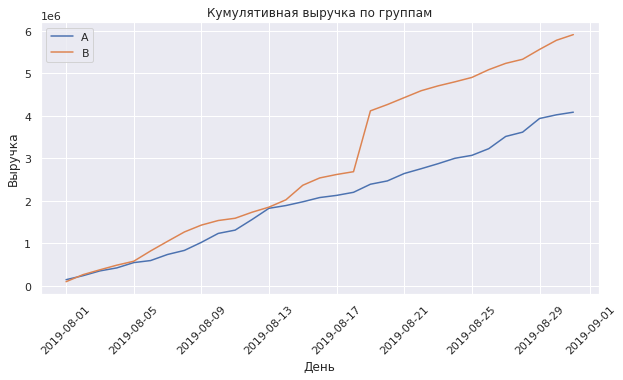

In [27]:
#строим график кумулятивной выручки по группам:
cumulativeRevenueA=cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB=cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend()
plt.xticks(rotation=45)
plt.title('Кумулятивная выручка по группам')
plt.xlabel('День')
plt.ylabel('Выручка')
plt.show()

### Вывод
Выручка от пользователей тестовой группы выше, начиная со второго дня эксперимента.К 13 августа они сошлись на показателе 2, после чего кривая выручки группа B пошла резко выше. Кумулятивная выручка группы А выглядит нормально, без резких изменений.
Раз выше выручка у группы В, то выросло либо количество покупателей, либо вырос средний чек.

### График кумулятивного среднего чека по группам

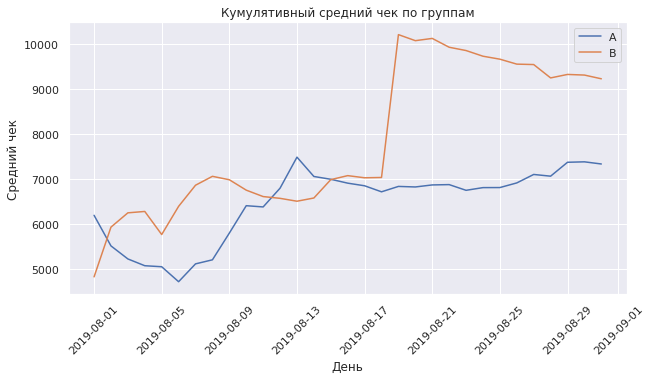

In [28]:
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date', 'revenue', 'orders']]
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.xticks(rotation=45)
plt.title('Кумулятивный средний чек по группам')
plt.xlabel('День')
plt.ylabel('Средний чек')
plt.show()

### Вывод

Кривая кумулятивного среднего чека группы B указывает, что скачок выручки в районе 18 августа обоснован резким возрастанием среднего чека в группе.

### График относительного изменения кумулятивного среднего чека группы B к группе A

In [29]:
mergedCumulativeRevenue = (
    cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
)

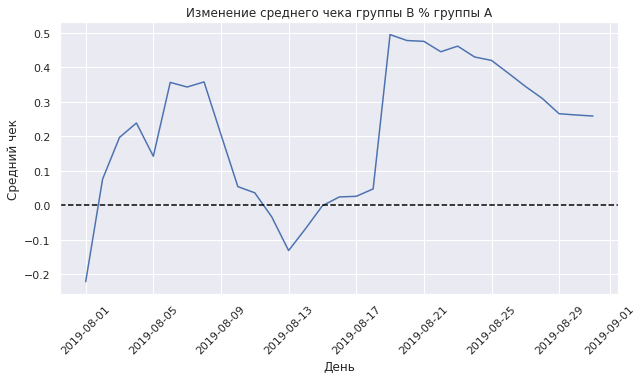

In [30]:
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=45)
plt.title('Изменение среднего чека группы B % группы А')
plt.xlabel('День')
plt.ylabel('Средний чек')
plt.show()


### Вывод
Относительный график ярче обозначил пик на 6 день эксперимента и обозначил кратковременное падение показателя 13 августа, а затем стремительный рост, превратившийся в скачок 18 августа. Возможно, это обусловлено вкравшимися выбросами. Исследуем дальше.

### График кумулятивной конверсии по группам

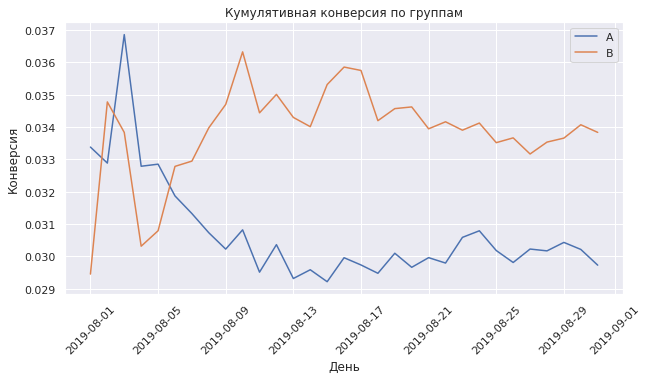

In [31]:
#Строим график конверсии по группам:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
#добавляем столбец с конверсией

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.xticks(rotation=45)
plt.title('Кумулятивная конверсия по группам')
plt.xlabel('День')
plt.ylabel('Конверсия')
plt.show()


### Вывод
На старте эскперимента конверсия растет стремительно в обеих группах, но в группе А дорастает до более высокого уровня, после чего замечаем стремительно падение. После примерно 6 августа конверсия группы В устанавливается на более высоком уровне. С 21 дня эксперимента колеблется в одном диапазоне 0.033-0.034. Возможно, что высокий изначальный показатель группы А связан с циклом принятия решений, завершение которого у пользователей пришлось на начало эксперимента.

### График относительного изменения кумулятивной конверсии группы B к группе A

In [32]:
mergedCumulativeConversions = (
    cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
)


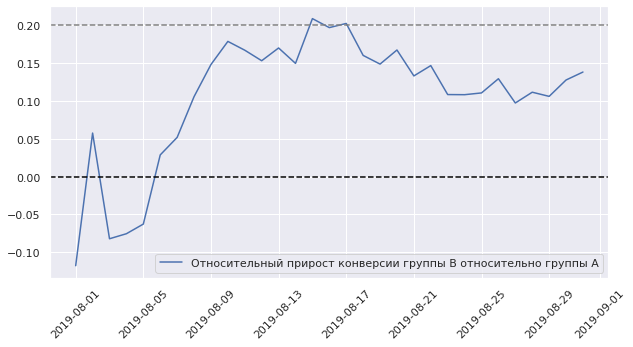

In [33]:
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.xticks(rotation=45)
plt.show()



 
Серая пунктирная линия создает дополнительный акцент на уровне максимального отрыва тестовой группы относительно контрольной:несколько дней разница в конверсии составляла целых 20 процентов! Если в этот момент допустить ошибку подсматривания, можно получить неадекватно завышенные результаты, которые не оправдаются в будущем. 



### Вывод
Пиковая разница в коверсии (целых 20 %) зафиксирована 14 августа. Хуже всего конверсия тестовой группы относительно группы А была на второй день эксперимента (-7 %). С 21 августа колебания установились в одном диапазоне 10-15 процентов.

### Точечный график количества заказов по пользователям

In [34]:
#создадим датафрейм из пользователей и заказов, на данных которого будет основан график:
orders_users = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

orders_users.columns = ['user_id', 'orders']
orders_users

,user_id,orders
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1
...,...,...
1026,4266935830,2
1027,4278982564,1
1028,4279090005,1
1029,4281247801,1


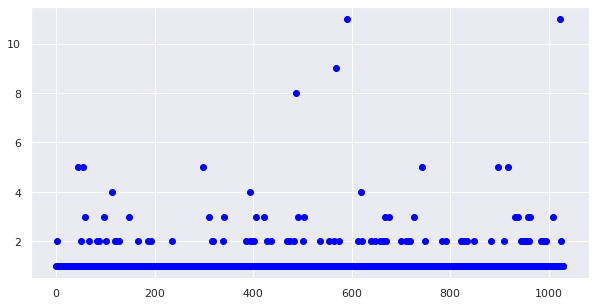

In [35]:
x_values = pd.Series(range(0,len(orders_users['orders'])))
plt.scatter(x_values, orders_users['orders'], color='blue')
plt.show()

### Вывод

В основном, пользователи совершают всего по одному заказу в исследуемый период, но есть и такие, кто находится в диапазоне 2-5 заказов, а совсем маленький процент совершают от 8 до 11 заказов. В принципе, в это можно поверить: маркетплейсы иногда дают скидку , действующую определенное время, после заказа на любую сумму. Таким образом, можно купить 11 вещей со скидкой, по одной в каждом отдельно оформленном заказе. Но выглядит на графике это экстраординарно, похоже на выбросы.

### Граница для определения аномальных пользователей

In [36]:
#посчитаем 95 и 99 перцентили:
np.percentile(orders_users['orders'], [95, 99])


array([2., 4.])

5 процентов пользователей совершают от 2 заказов, и только 1 процент от 4. Примем, что все, что за 99 перцентилем -выброс

In [37]:
limit_by_orders = np.percentile(orders_users['orders'], [99])


###  Точечный график стоимостей заказов

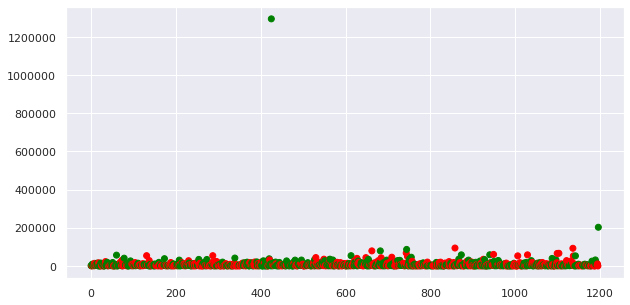

In [38]:
plt.scatter(range(0,len(orders['revenue'])), orders['revenue'], c=orders['group'].map({'A': 'red', 'B': 'green'}))
plt.ticklabel_format(style='plain', axis='y')
plt.show()


На выбросы походят только два значения.

### Граница для определения аномальных заказов

In [39]:
np.percentile(orders['revenue'], [90, 95, 99])

array([18168. , 28000. , 58233.2])

В случае со стоимостью заказов также возьмем за выбросы значения выше 99 перцентиля.

In [40]:
limit_by_revenue = 58233.2

### Cтатистичесrкая значимость различий в конверсии между группами по «сырым» данным. 

In [41]:
#строим таблицу по сырым данным, на основе которой будет проводиться стат. тест.
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)
data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [42]:
#Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. 
#В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

In [43]:
#Объявите переменные sampleA и sampleB, 
#в которых пользователям с заказами будет соответствовать число заказов пользователя. А пользователям без заказов — нули.
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)


**Проверим гипотезу Ho о том, чторазличий в конверсии между группами нет (конверсии равны). Альтернативная гипотеза: различия в среднем чеке между группами есть (конверсии не равны)**


In [44]:
print('{0:.5f}'.format(st.mannwhitneyu(sampleA, sampleB)[1]))
print('{0:.3f}'.format(sampleB.mean()/sampleA.mean()-1)) 

0.01679
0.138


In [45]:
stat, p = mannwhitneyu(sampleA, sampleB)
print('p=%.3f' % (p))
print('{0:.3f}'.format(sampleB.mean()/sampleA.mean()-1)) 
alpha = 0.05
if p < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p=0.017
0.138
Отвергаем нулевую гипотезу


Группы не равны по конверсии. Отрыв группы В составляет 13,8 %

### Вывод

p-value < 0.05 (принимаемого по умолчанию уровня статистической значимости), значит, Н0 о равенстве конверсий в группах отвергаем. Относительный прирост конверсии группы В равен 13,8.

### Cтатистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

H0 - средние чеки в группе А и группе В равны;
H1 - средние чеки в группах отличаются

In [46]:
print('{0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

0.729
0.259


In [47]:
average_a = orders[orders['group']=='A']['revenue']
average_b =  orders[orders['group']=='B']['revenue']
stat, p = mannwhitneyu(average_a, average_b)
print('p=%.3f' % (p))
print('{0:.3f}'.format(average_b.mean()/average_a.mean()-1)) 
alpha = 0.05
if p < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p=0.729
0.259
Не получилось отвергнуть нулевую гипотезу


### Вывод

Нельзя отвергнуть гипотезу о равенстве в среднем чеке,хотя разница в пользу группы B составляет 25,9 %.

### Cтатистичесrкая значимость различий в конверсии между группами по «очищенным» данным. 

За выбросы были приняты значения количества заказов выше 4 и стоимость заказов выше 99 перцентиля.

In [48]:
#пользователи с неподходящими показателями по вышеуказанным параментам выделяются в отдельную таблицу:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 4]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 4]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > limit_by_revenue]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
abnormalUsers.head(10)

1099     148427295
949      887908475
744      888512513
1103    1164614297
1136    1307669133
858     1316129916
425     1920142716
227     2038680547
1196    2108080724
326     2378935119
dtype: int64

In [49]:
#удаляем неподходящих пользователей из выборок:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

**Посчитаем статистическую значимость в различиях между конверсиями двух групп по очищенным от выбросов данных.
За H0 все так же принимаем утверждение о равенстве в конверсиях двух выборок, H1 - о том, что конверсии не равны:**

In [50]:
print('{0:.5f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.01438
0.153


In [51]:
stat, p = mannwhitneyu(sampleAFiltered, sampleBFiltered)
print('p=%.3f' % (p))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 
alpha = 0.05
if p < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p=0.014
0.153
Отвергаем нулевую гипотезу


### Вывод

Статистическая значимость не достигнута и в случае очистки данных от выбросов, конверсии групп отличны в пользу группы B на 15,3 %.

### Cтатистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [52]:
print(
    '{0:.3f}'.format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)
print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

0.851
-0.006


In [53]:
average_filt_a= orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue']
average_filt_b =  orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue']

In [54]:
stat, p = mannwhitneyu(average_filt_a, average_filt_b)
print('p=%.3f' % (p))
print('{0:.3f}'.format(average_filt_b.mean()/average_filt_a.mean()-1)) 
alpha = 0.05
if p < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p=0.851
-0.006
Не получилось отвергнуть нулевую гипотезу


Нельзя опровергнуть гипотезу о разнице средних чеков и после очистки выбросов. Различие небольшое и составляет всего 0,6 % в пользу группы А. На феноменальный скачок среднего чека группы В повлияли выбросы.

## Общий вывод


- На протяжении всего исследования тестируемая группа (В) давала лучшие показатели относительно контрольной (А): по выручке, по конверсии и среднему чеку до исключения "выбросов" и по конверсии после их исключения. Покупки, стоимость которых была принята за аномалии, совершались в тестируемой группе. 
- Если для теста была выбрана гипотеза № 2 ("Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"), то в исследуемый период был достигнут только 1 показатель -увеличение конверсии в тестовой группе;
- В среднем, конверсия группы В выше на 15,3 процента, подтверждено статистически и неслучайно. Это высокий показатель;
- Если тестировали гипотезу 6 ("Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию"), то цель,безусловно, достигнута;
- По истечении месяца эксперимента кривые конверсии ведут себя довольно предсказуемо. Есть предложение остановить тест и поработать над следующей гипотезой, которая сосредоточена на увеличении именно среднего чека. 
